# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

 

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

 

And this is where you come in as a data analyst. Your job is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are provided below.

## 1. Read and visualise the data

In [1]:
# import the Required libraries 

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
help_df = pd.read_csv("Country-data.csv") # Read the data and seen the dataset.
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
help_df.shape # shape of the dataset

(167, 10)

In [4]:
len(list(help_df['country'].unique())) # checked weather the all the names in country column unique or not. 

167

In [5]:
help_df.info() # saw the no of null values and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
help_df.describe() # describe the whole data set and find the maximum, minimum and average values of each variable.

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
 help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
help_df.columns # saw the variable names.

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

## Steps to follow

1. Data Quality Check
2. EDA: Univariate and Bivariate
3. Outlier
4. Hopkin's Test
5. Scaling
6. Find the best value of k using SSD Elbow, Silhoutte Score
7. Using the final value of k, perform the kMeans analysis
8. Visualize it using scatterplot
9. Perform Cluster profiling: GDPP, CHILD_MORT and INCOME.
10. Hierarchial Clustering: Single linkage, Complete Linkage

## 1. Data Quality Check.

In [9]:
# Data Quality Check

help_df['exports'] = help_df['exports']*help_df['gdpp']/100
# Converted exports, imports and health in percentage GDP to actual values

# Similarly for imports and health.

help_df['imports'] = help_df['imports']*help_df['gdpp']/100


help_df['health'] = help_df['health']*help_df['gdpp']/100


In [10]:
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [11]:
help_df['exports'] = round(help_df['exports'], 2) # Rounded off the columns exports, imports and health to 2.

help_df['imports'] = round(help_df['imports'], 2)

help_df['health'] = round(help_df['health'], 2)

In [12]:
help_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


In [13]:
help_df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618862,1056.733174,6588.352096,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885789,1801.408921,14710.810423,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.080000,12.820000,0.650000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535000,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.890000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


## 2. EDA: Univariate and Bivariate

In [14]:
help_df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [15]:
data_req = help_df[['country', 'child_mort', 'income', 'gdpp']] # subset the target columns and store in another data frame
data_req.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
1,Albania,16.6,9930,4090
2,Algeria,27.3,12900,4460
3,Angola,119.0,5900,3530
4,Antigua and Barbuda,10.3,19100,12200


In [16]:
col = list(data_req.columns)
col

['country', 'child_mort', 'income', 'gdpp']

In [17]:
col = col[1:]
col

['child_mort', 'income', 'gdpp']

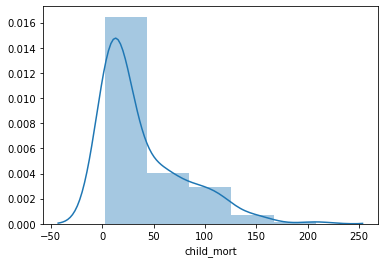

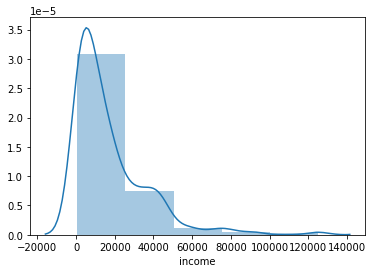

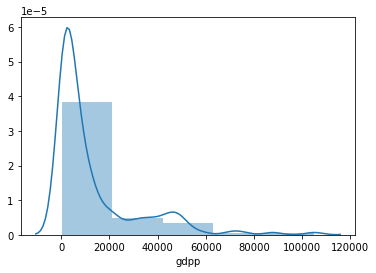

In [18]:
# Distribution of the columns: distplot()

for c in col:
    sns.distplot(data_req[c], bins = 5)
    plt.show();

# We observed all the distplots are following the normal distribution.

In [19]:
data_req[col].corr() # correlation between the target variables. 


,child_mort,income,gdpp
child_mort,1.000000,-0.524315,-0.483032
income,-0.524315,1.000000,0.895571
gdpp,-0.483032,0.895571,1.000000


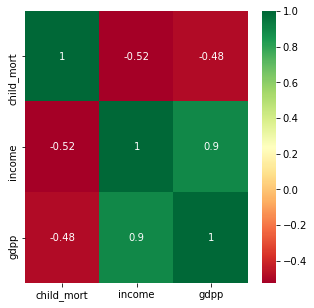

In [20]:
plt.figure(figsize=(5,5))
sns.heatmap(data_req[col].corr(), annot=True, cmap = 'RdYlGn')
plt.show()

### Inference : 
    1. It is clearly seen that the child mortality rate is high in low income and low gdpp countries and vice versa.

## 3. Outlier Analysis

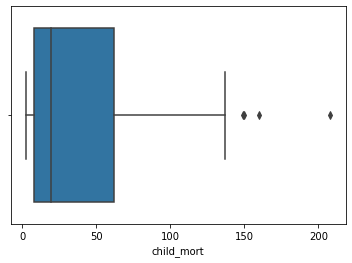

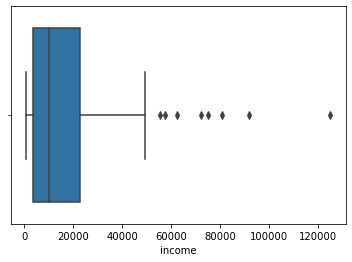

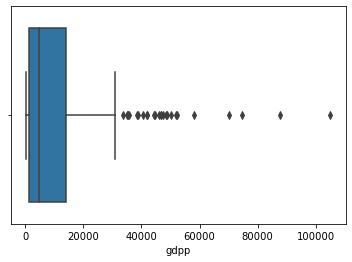

In [21]:
for c in col:
    sns.boxplot(data_req[c]) 
    plt.show();
    
# It is clearly seen that the outliers are there in all the variables, we can either remove them or cap them to a certain value.

In [22]:
data_req[col].describe()

,child_mort,income,gdpp
count,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,12964.155689
std,40.328931,19278.067698,18328.704809
min,2.600000,609.000000,231.000000
25%,8.250000,3355.000000,1330.000000
50%,19.300000,9960.000000,4660.000000
75%,62.100000,22800.000000,14050.000000
max,208.000000,125000.000000,105000.000000


In [23]:
data_req [data_req.income > data_req.income.quantile(0.99)]

,country,child_mort,income,gdpp
91,Luxembourg,2.8,91700,105000
123,Qatar,9.0,125000,70300


In [24]:
data_req [data_req.income < data_req.income.quantile(0.01)]

,country,child_mort,income,gdpp
37,"Congo, Dem. Rep.",116.0,609,334
88,Liberia,89.3,700,327


In [25]:
data_req [data_req.gdpp > data_req.gdpp.quantile(0.99)]

,country,child_mort,income,gdpp
91,Luxembourg,2.8,91700,105000
114,Norway,3.2,62300,87800


In [26]:
data_req [data_req.gdpp < data_req.gdpp.quantile(0.01)]

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327


In [27]:
data_req [data_req.child_mort > data_req.child_mort.quantile(0.98)]

,country,child_mort,income,gdpp
31,Central African Republic,149.0,888,446
32,Chad,150.0,1930,897
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399


In [28]:
data_req [data_req.child_mort < data_req.child_mort.quantile(0.02)]

,country,child_mort,income,gdpp
68,Iceland,2.6,38800,41900
91,Luxembourg,2.8,91700,105000
133,Singapore,2.8,72100,46600


In [29]:
# Outlier Treatement 

Q1 = data_req.income.quantile(0.0)
Q3 = data_req.income.quantile(0.85)
IQR = Q3 - Q1
data_req = data_req[(data_req.income >= Q1 - 1.5*IQR) & (data_req.income <= Q3 + 1.5*IQR)]

Q1 = data_req.gdpp.quantile(0.0)
Q3 = data_req.gdpp.quantile(0.85)
IQR = Q3 - Q1
data_req = data_req[(data_req.gdpp >= Q1 - 1.5*IQR) & (data_req.gdpp <= Q3 + 1.5*IQR)]

In [30]:
data_req.head()

,country,child_mort,income,gdpp
0,Afghanistan,90.2,1610,553
1,Albania,16.6,9930,4090
2,Algeria,27.3,12900,4460
3,Angola,119.0,5900,3530
4,Antigua and Barbuda,10.3,19100,12200


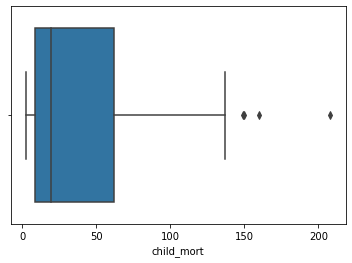

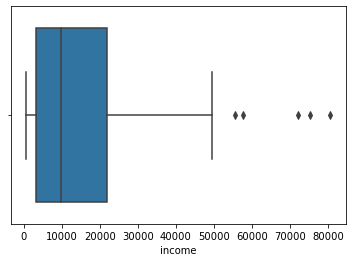

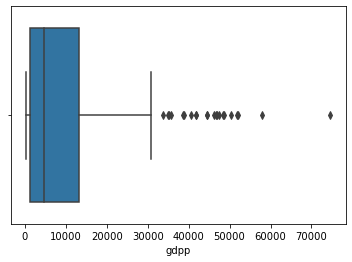

In [31]:
for c in col:
    sns.boxplot(data_req[c])
    plt.show();

# the boxplots after the outlier treatment.

## 4. Hopkin's Test

In [32]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [33]:
# How different your date is from the randomly scattered data?

hopkins(data_req[col])

0.8605884443000131

The more the dataset is different from the random distribution, the better candidate it is for performing Clustering.


## 5. Scaling

In [34]:
# Create a data frame without country column
cig_df = data_req[col]

# instantiate
scaler = StandardScaler()

# fit_transform
cig_df_scaled = scaler.fit_transform(cig_df)
cig_df_scaled.shape

(164, 3)

In [35]:
cig_df_scaled # it thows you a 2D array of scaled values.

array([[ 1.27293318, -0.88248334, -0.72456864],
       [-0.55258189, -0.36348893, -0.49251587],
       [-0.28718771, -0.1782229 , -0.46824119],
       [ 1.98726517, -0.61487685, -0.52925592],
       [-0.70884201,  0.20852775,  0.03955876],
       [-0.60466859,  0.18357609, -0.08509498],
       [-0.5153771 , -0.56497354, -0.54959416],
       [-0.84525958,  1.59958247,  2.64416576],
       [-0.85766117,  1.71186492,  2.31612961],
       [ 0.00797029,  0.01515242, -0.37770322],
       [-0.62203083,  0.44556846,  1.07615298],
       [-0.75100744,  1.58086873,  0.59722021],
       [ 0.26096287, -0.83070866, -0.71111916],
       [-0.61210955, -0.02851297,  0.28886623],
       [-0.82789734,  0.02762825, -0.36523785],
       [-0.85270053,  1.58086873,  2.15211154],
       [-0.49801486, -0.49136616, -0.47611406],
       [ 1.78883962, -0.86938372, -0.71111916],
       [ 0.09478147, -0.5824397 , -0.61782568],
       [ 0.19151393, -0.64544262, -0.63094712],
       [-0.79317287, -0.37658855, -0.458

In [36]:
data_req[col].columns

Index(['child_mort', 'income', 'gdpp'], dtype='object')

In [37]:
# Create a dataframe using that array
cig_df_scaled = pd.DataFrame(cig_df_scaled)


cig_df_scaled.columns = ['child_mort', 'income', 'gdpp']
cig_df_scaled.head()

,child_mort,income,gdpp
0,1.272933,-0.882483,-0.724569
1,-0.552582,-0.363489,-0.492516
2,-0.287188,-0.178223,-0.468241
3,1.987265,-0.614877,-0.529256
4,-0.708842,0.208528,0.039559


# Modelling

In [38]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(cig_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [39]:
kmeans.labels_  # gives you the lables 0,1,2,3

array([3, 1, 1, 3, 0, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 2, 1, 3, 1, 1, 1, 1,
       0, 2, 0, 3, 3, 1, 3, 2, 1, 3, 3, 0, 1, 1, 3, 3, 1, 0, 3, 0, 2, 0,
       2, 1, 1, 1, 1, 3, 1, 0, 1, 2, 2, 1, 3, 1, 2, 3, 0, 1, 1, 3, 3, 1,
       3, 0, 2, 1, 1, 0, 1, 2, 0, 2, 1, 2, 1, 0, 1, 1, 2, 1, 3, 0, 0, 3,
       3, 0, 0, 1, 1, 3, 0, 1, 3, 0, 3, 0, 1, 1, 1, 0, 1, 3, 1, 1, 1, 2,
       2, 3, 3, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 3, 2, 0,
       0, 1, 1, 0, 0, 1, 1, 3, 1, 2, 2, 1, 3, 1, 1, 3, 1, 1, 0, 1, 3, 1,
       2, 2, 2, 0, 1, 1, 0, 1, 1, 3])

## 6. Finding the Optimal Number of Clusters

### SSD

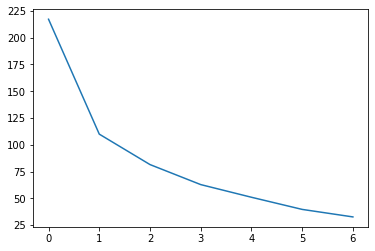

In [40]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cig_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

- From the elbow curve, it is seen that either 3 or 4 clusters can be a good choice.

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [41]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(cig_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cig_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.5781835155319744
For n_clusters=3, the silhouette score is 0.5342692676330563
For n_clusters=4, the silhouette score is 0.4681763787214793
For n_clusters=5, the silhouette score is 0.4598173357113205
For n_clusters=6, the silhouette score is 0.45721768283609077


- Inference : It is clear from silhoutte score that 4 or 5 can be a good choiuce for number of clusters.

## 7. Using the final value of k, perform the kMeans analysis


In [42]:
# final model with k=4 or k =5
kmeans = KMeans(n_clusters = 4, max_iter=50)
kmeans.fit(cig_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [43]:
kmeans.labels_

array([1, 2, 2, 1, 3, 3, 2, 0, 0, 2, 3, 3, 2, 3, 2, 0, 2, 1, 2, 2, 2, 2,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 2, 2, 1, 1, 2, 2, 1, 3, 3, 3,
       0, 2, 2, 2, 2, 1, 2, 3, 2, 0, 0, 2, 1, 2, 0, 1, 3, 2, 2, 1, 1, 2,
       1, 3, 0, 2, 2, 2, 2, 0, 3, 0, 2, 0, 2, 3, 2, 2, 0, 2, 1, 3, 3, 1,
       1, 3, 3, 2, 2, 1, 3, 2, 1, 3, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0,
       0, 1, 1, 3, 1, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 1, 0, 3,
       3, 2, 2, 3, 3, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 2, 3, 2, 1, 2,
       0, 0, 0, 3, 2, 2, 3, 2, 2, 1])

In [44]:
# assign the label
data_req['cluster_id'] = kmeans.labels_
data_req.head() 

,country,child_mort,income,gdpp,cluster_id
0,Afghanistan,90.2,1610,553,1
1,Albania,16.6,9930,4090,2
2,Algeria,27.3,12900,4460,2
3,Angola,119.0,5900,3530,1
4,Antigua and Barbuda,10.3,19100,12200,3


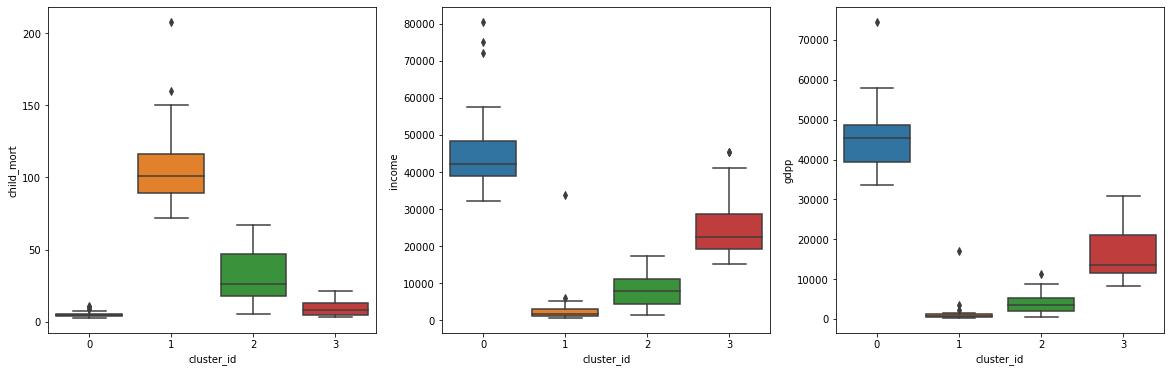

In [45]:
# plot the Boxplots to understand which cluster is more to be targeted.
plt.figure(figsize = [20,6])
plt.subplot(1, 3 ,1)
sns.boxplot(x='cluster_id', y='child_mort', data=data_req)
plt.subplot(1, 3 ,2)
sns.boxplot(x='cluster_id', y='income', data = data_req)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_id', y='gdpp', data = data_req)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=None)
plt.show()

### Inference: 
    1. From the boxplots, we can infer that the countries in cluster 2 are the most vulnerable and to be concentrated on first. We can also observe that the countries in the cluster 2 are having median child mortality rate of above 100 and their income and GDPs are too low.

In [46]:
len(data_req[data_req['cluster_id'] == 0])

22

In [47]:
len(data_req[data_req['cluster_id'] == 1])

33

In [48]:
len(data_req[data_req['cluster_id'] == 2])

75

In [49]:
len(data_req[data_req['cluster_id'] == 3])

34

In [50]:
data_req[data_req['cluster_id'] == 0].head(10)

,country,child_mort,income,gdpp,cluster_id
7,Australia,4.8,41400,51900,0
8,Austria,4.3,43200,46900,0
15,Belgium,4.5,41100,44400,0
23,Brunei,10.5,80600,35300,0
29,Canada,5.6,40700,47400,0
44,Denmark,4.1,44000,58000,0
53,Finland,3.0,39800,46200,0
54,France,4.2,36900,40600,0
58,Germany,4.2,40400,41800,0
68,Iceland,2.6,38800,41900,0


In [51]:
data_req[data_req['cluster_id'] == 2].head(10)

,country,child_mort,income,gdpp,cluster_id
1,Albania,16.6,9930,4090,2
2,Algeria,27.3,12900,4460,2
6,Armenia,18.1,6700,3220,2
9,Azerbaijan,39.2,16000,5840,2
12,Bangladesh,49.4,2440,758,2
14,Belarus,5.5,16200,6030,2
16,Belize,18.8,7880,4340,2
18,Bhutan,42.7,6420,2180,2
19,Bolivia,46.6,5410,1980,2
20,Bosnia and Herzegovina,6.9,9720,4610,2


data_req[data_req['cluster_id'] == 2]

## 7. Visualise using Scatter Plot. 


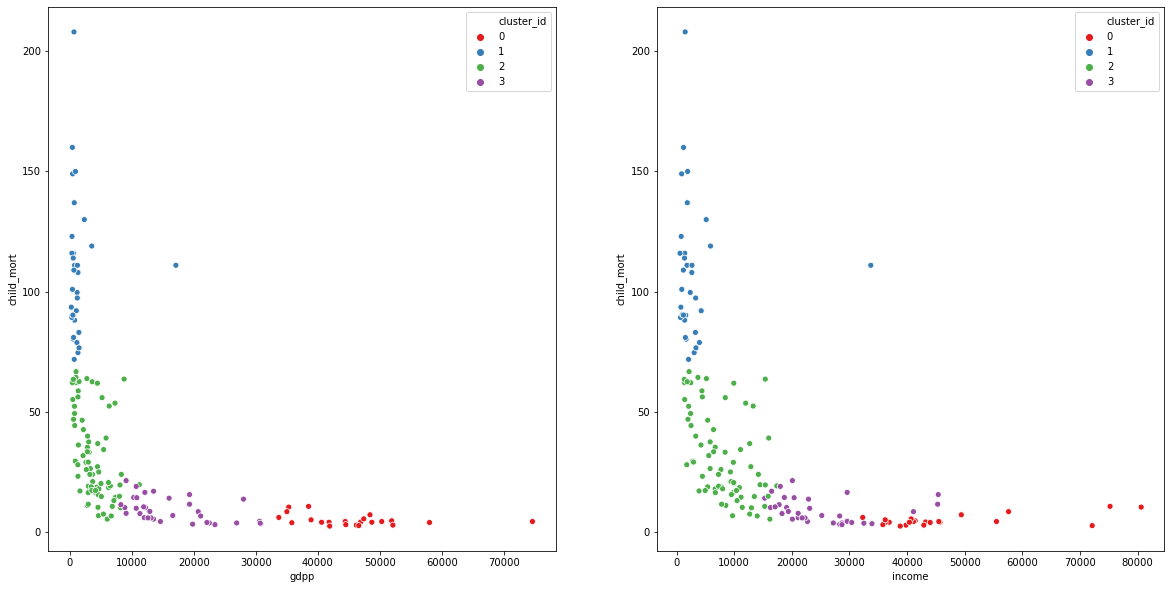

In [52]:
# Scatter plot to visualize the data based on K_means clustering
plt.figure(figsize = [20,10])
plt.subplot(1, 2 ,1)
sns.scatterplot(x='gdpp', y='child_mort', hue= 'cluster_id', data=data_req, palette='Set1')
plt.subplot(1, 2 ,2)
sns.scatterplot(x='income', y='child_mort', hue= 'cluster_id', data= data_req, palette='Set1')
plt.show()

## 9. Perform Cluster profiling:

    GDPP, CHILD_MORT and INCOME.

    We do this to make sense out of the cluster.

    We are required to find one such cluster that is having LOW GDPP, LOW INCOME and HIGH CHILD_MORT.

In [53]:
c1 = data_req[data_req['cluster_id']==0]

c1.sort_values(by=[ 'child_mort', 'income',  'gdpp'], ascending= [False, True, True]).head(10)


,country,child_mort,income,gdpp,cluster_id
82,Kuwait,10.8,75200,38500,0
23,Brunei,10.5,80600,35300,0
157,United Arab Emirates,8.6,57600,35000,0
159,United States,7.3,49400,48400,0
111,New Zealand,6.2,32300,33700,0
29,Canada,5.6,40700,47400,0
158,United Kingdom,5.2,36200,38900,0
7,Australia,4.8,41400,51900,0
15,Belgium,4.5,41100,44400,0
110,Netherlands,4.5,45500,50300,0


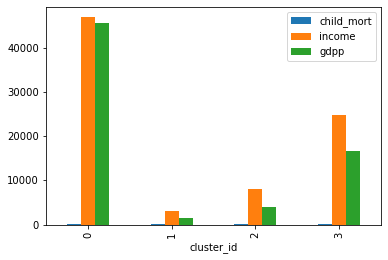

In [54]:
data_req[['child_mort', 'income', 'gdpp','cluster_id']].groupby('cluster_id').mean().plot(kind= 'bar');
plt.show()

## 10. Hierarchical Clustering


In [55]:
cig_df_scaled.head()

,child_mort,income,gdpp
0,1.272933,-0.882483,-0.724569
1,-0.552582,-0.363489,-0.492516
2,-0.287188,-0.178223,-0.468241
3,1.987265,-0.614877,-0.529256
4,-0.708842,0.208528,0.039559


In [56]:
data_req.head()

,country,child_mort,income,gdpp,cluster_id
0,Afghanistan,90.2,1610,553,1
1,Albania,16.6,9930,4090,2
2,Algeria,27.3,12900,4460,2
3,Angola,119.0,5900,3530,1
4,Antigua and Barbuda,10.3,19100,12200,3


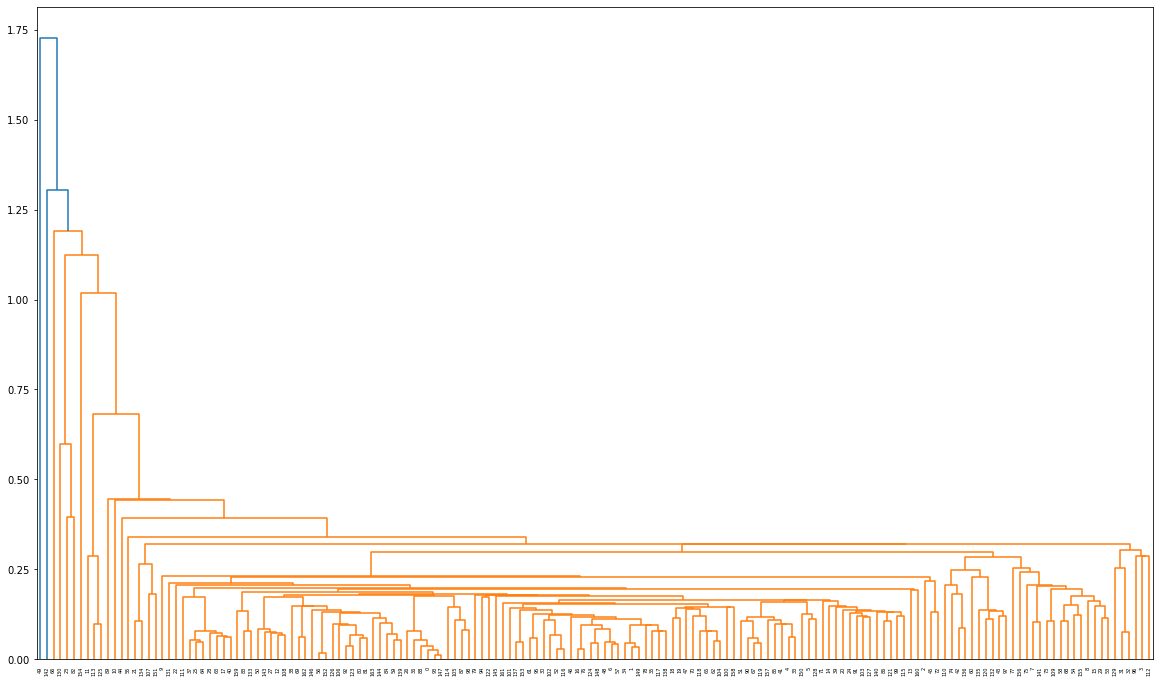

In [57]:
# single linkage
mergings = linkage(cig_df_scaled, method="single", metric='euclidean')
plt.figure(figsize = [20,12])
dendrogram(mergings)
plt.show()


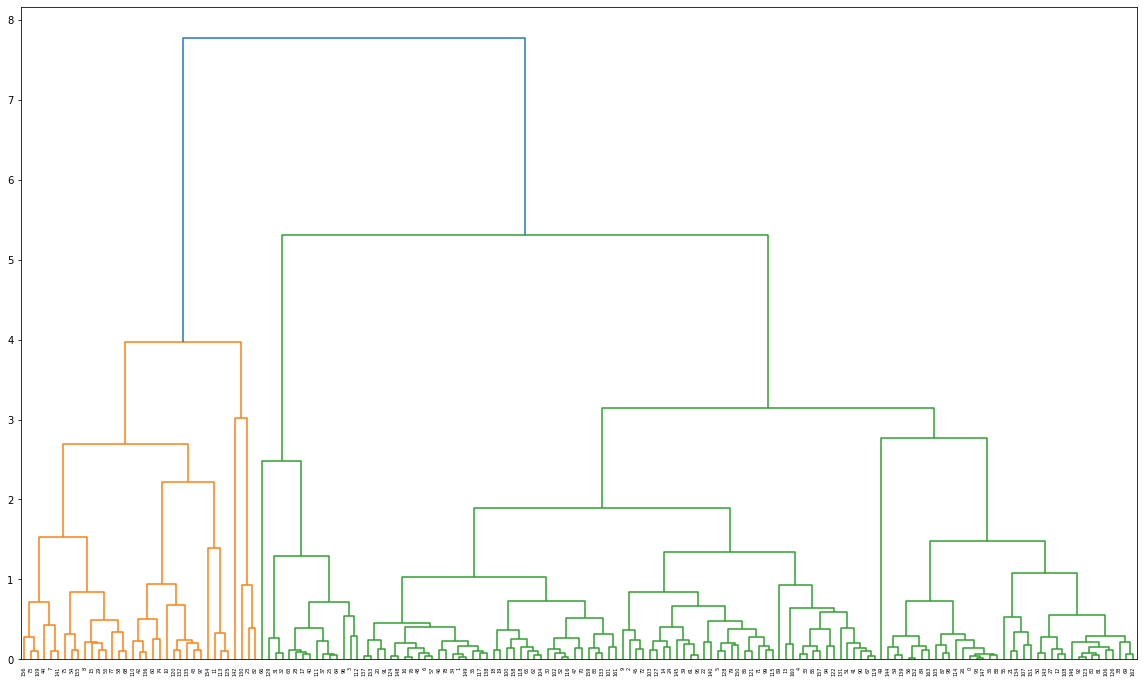

In [58]:
# complete linkage
mergings = linkage(cig_df_scaled, method="complete", metric='euclidean')
plt.figure(figsize = [20,12])
dendrogram(mergings)
plt.show()

In [59]:
# form 4 clusters using cut_tree function
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0,
       0, 3, 0, 1, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 1, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 3, 0,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 0, 0])

In [60]:
# assign cluster labels
data_req['cluster_labels'] = cluster_labels
data_req.head()

,country,child_mort,income,gdpp,cluster_id,cluster_labels
0,Afghanistan,90.2,1610,553,1,0
1,Albania,16.6,9930,4090,2,0
2,Algeria,27.3,12900,4460,2,0
3,Angola,119.0,5900,3530,1,1
4,Antigua and Barbuda,10.3,19100,12200,3,0


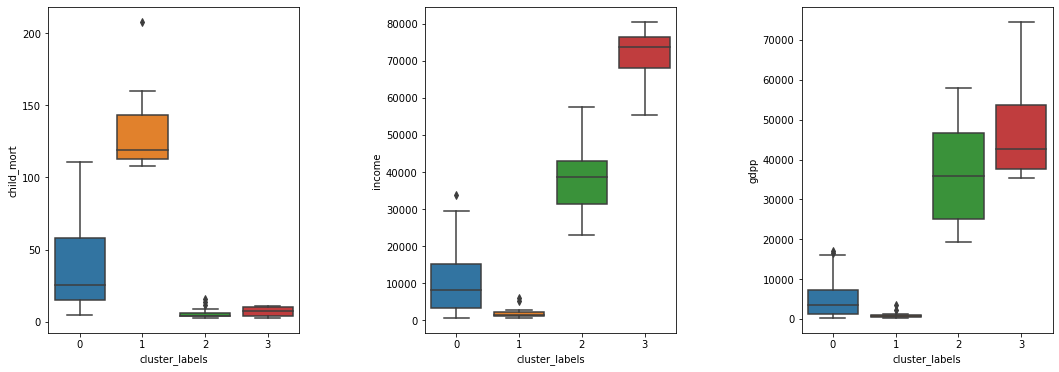

In [61]:
# plots
plt.figure(figsize = [18,6])
plt.subplot(1, 3 ,1)
sns.boxplot(x='cluster_labels', y='child_mort', data = data_req)
plt.subplot(1, 3 ,2)
sns.boxplot(x='cluster_labels', y='income', data = data_req)
plt.subplot(1,3,3)
sns.boxplot(x='cluster_labels', y='gdpp', data = data_req)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
plt.show()

### Inference: 
- From hirarcial clustering algorithm, the cluster label 1 is the most vulnerable and needs help from help international immediatley.

In [62]:
len(data_req[data_req['cluster_labels'] == 0])

114

In [63]:
len(data_req[data_req['cluster_labels'] == 1])

15

In [64]:
len(data_req[data_req['cluster_labels'] == 2])

31

In [65]:
len(data_req[data_req['cluster_labels'] == 3])

4

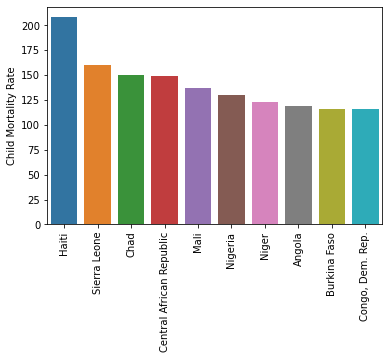

In [66]:

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = data_req[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort)
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation = 90)
plt.show()

In [67]:
data_req[data_req['cluster_id'] == 0].sort_values('child_mort', ascending = False).head(10)
# sorted the data frame on child_mortality in descending order with cluster id 0 to get some insights.

,country,child_mort,income,gdpp,cluster_id,cluster_labels
82,Kuwait,10.8,75200,38500,0,3
23,Brunei,10.5,80600,35300,0,3
157,United Arab Emirates,8.6,57600,35000,0,2
159,United States,7.3,49400,48400,0,2
111,New Zealand,6.2,32300,33700,0,2
29,Canada,5.6,40700,47400,0,2
158,United Kingdom,5.2,36200,38900,0,2
7,Australia,4.8,41400,51900,0,2
110,Netherlands,4.5,45500,50300,0,2
145,Switzerland,4.5,55500,74600,0,3


In [68]:
data_req[data_req['cluster_id'] == 1].sort_values('child_mort', ascending = False).head(10)
# sorted the data frame on child_mortality in descending order with cluster id 1 to get some insights.

,country,child_mort,income,gdpp,cluster_id,cluster_labels
66,Haiti,208.0,1500,662,1,1
132,Sierra Leone,160.0,1220,399,1,1
32,Chad,150.0,1930,897,1,1
31,Central African Republic,149.0,888,446,1,1
97,Mali,137.0,1870,708,1,1
113,Nigeria,130.0,5150,2330,1,1
112,Niger,123.0,814,348,1,1
3,Angola,119.0,5900,3530,1,1
25,Burkina Faso,116.0,1430,575,1,1
37,"Congo, Dem. Rep.",116.0,609,334,1,1


In [69]:
data_req[data_req['cluster_id'] == 3].sort_values('child_mort', ascending = False).head(10)
# sorted the data frame on child_mortality in descending order with cluster id 1 to get some insights.

,country,child_mort,income,gdpp,cluster_id,cluster_labels
79,Kazakhstan,21.5,20100,9070,3,0
153,Turkey,19.1,18000,10700,3,0
163,Venezuela,17.1,16500,13500,3,0
89,Libya,16.6,29600,12100,3,0
128,Saudi Arabia,15.7,45400,19300,3,2
5,Argentina,14.5,18700,10300,3,0
131,Seychelles,14.4,20400,10800,3,0
13,Barbados,14.2,15300,16000,3,0
10,Bahamas,13.8,22900,28000,3,2
115,Oman,11.7,45300,19300,3,2


In [70]:
data_req[data_req['cluster_id'] == 0].sort_values('child_mort', ascending = False).head(10)

# sorted the data frame on child_mortality in descending order with cluster id 0 to get some insights.

,country,child_mort,income,gdpp,cluster_id,cluster_labels
82,Kuwait,10.8,75200,38500,0,3
23,Brunei,10.5,80600,35300,0,3
157,United Arab Emirates,8.6,57600,35000,0,2
159,United States,7.3,49400,48400,0,2
111,New Zealand,6.2,32300,33700,0,2
29,Canada,5.6,40700,47400,0,2
158,United Kingdom,5.2,36200,38900,0,2
7,Australia,4.8,41400,51900,0,2
110,Netherlands,4.5,45500,50300,0,2
145,Switzerland,4.5,55500,74600,0,3


## Conclusion: 

1. We can conclude that the Clusters with cluster_id 0 using K_Means algorithm and cluster_labels 1 using hirarchical clusterings are the most vulnerable countries and need help with immediate effect. 

2. The Countries **`HAITI`**, **`Sierra Leone`**, **`Chad`**, **`Central African Republic`**, **`Mali`** are the top five countries which needs immediate attention from **`HELP international`**.
